# This notebook aims to test ultralytics YOLOv8 model on, dataset of choice is coco8 (reasoned below)

In [ ]:
!pip install ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# imports
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from matplotlib import pyplot as plt
import numpy as np
import os
from tabulate import tabulate

In [4]:
model = YOLO('yolov8n.pt') # load a pre-trained model
model.info()

100%|██████████| 6.23M/6.23M [00:00<00:00, 143MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

#Dataset for Training
Now, the coco8 dataset,  a subset of the coco dataset, contains the following classes

  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

(Source :https://docs.ultralytics.com/datasets/detect/coco8/#dataset-yaml)

## Reason
Since we are just testing models, right now we stick to this dataset. Ultralytics provides some more datasets which we can train the model on.


1. Argoverse: 3D tracking and motion forecasting data from urban environments with rich annotations.
2. COCO: Large-scale dataset for object detection, segmentation, and captioning with over 200K labeled images.
3. COCO8: Subset of COCO containing the first 4 images from train and val sets, suitable for quick tests.
4. Global Wheat 2020: Dataset of wheat head images collected worldwide for object detection and localization tasks.
5. Objects365: High-quality, large-scale dataset for object detection with 365 object categories and over 600K annotated images.
6. OpenImagesV7: Comprehensive dataset by Google with 1.7M train images and 42k validation images.
7. SKU-110K: Dataset featuring dense object detection in retail environments with over 11K images and 1.7 million bounding boxes.
8. VisDrone: Dataset containing object detection and multi-object tracking data from drone-captured imagery with over 10K images and video sequences.
9. VOC: Pascal Visual Object Classes dataset for object detection and segmentation with 20 object classes and over 11K images.
10. xView: Dataset for object detection in overhead imagery with 60 object categories and over 1 million annotated objects.
11. Roboflow 100: Diverse object detection benchmark with 100 datasets spanning seven imagery domains for comprehensive model evaluation.

`OpenImagesV7` (`6`) seems a good candidate for proper training. It has 600 label-classes (unlike cooc8 having only 80).
For our playground purposes, we simply stick to coco8 for fast training. We'll train it on 100 epochs, just how the documentation for it does.



In [ ]:
results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

## Making predictions
We'll by trying out some images from the coco dataset itself to see how well it is working.

In [9]:
def display_side_by_side(image1, image2):
    """
    Display two images side by side.

    Parameters:
        image1 (numpy.ndarray): The first image.
        image2 (numpy.ndarray): The second image.
    """
    concatenated_image = cv2.hconcat([image1, image2])

    cv2_imshow(concatenated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()




image 1/1 /content/cat.png: 640x640 1 cat, 508.2ms
Speed: 13.7ms preprocess, 508.2ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


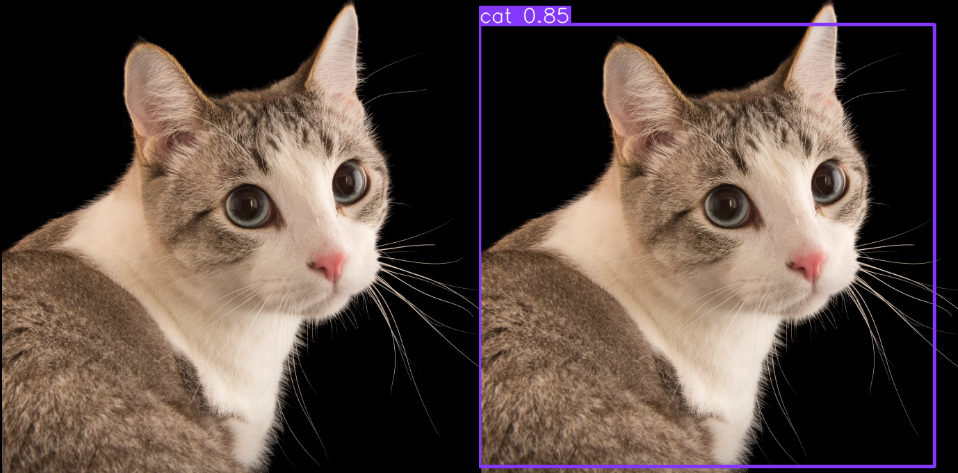

In [11]:
# First, lets try it on a cat !
cat_result = model("/content/cat.png")
cat_result[0].save("/content/cat_result.png")
image1 = cv2.imread("/content/cat.png")
image2 = cv2.imread("/content/cat_result.png")
display_side_by_side(image1, image2)

In [28]:
cat_result[0].orig_shape, cat_result[0].speed

((473, 479),
 {'preprocess': 13.678312301635742,
  'inference': 508.1930160522461,
  'postprocess': 7.530450820922852})

In [30]:
%cd /content/drive/MyDrive/images
!ls

/content/drive/MyDrive/images
000000000009.jpg  000000000025.jpg  000000000030.jpg  000000000034.jpg


In [37]:
paths = ["000000000009.jpg",  "000000000025.jpg",  "000000000030.jpg", "000000000034.jpg"]
image_results = []
saved_paths = []

for path in paths:
    filename, extension = os.path.splitext(path)
    save_path = f"{filename}_result{extension}"

    curr_result = model(path)[0]
    curr_result[0].save(save_path)

    image_results.append(curr_result)
    saved_paths.append(save_path)



image 1/1 /content/drive/My Drive/images/000000000009.jpg: 480x640 5 bowls, 1 broccoli, 745.5ms
Speed: 20.0ms preprocess, 745.5ms inference, 5.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/My Drive/images/000000000025.jpg: 448x640 1 giraffe, 460.8ms
Speed: 14.1ms preprocess, 460.8ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/My Drive/images/000000000030.jpg: 448x640 1 potted plant, 1 vase, 289.0ms
Speed: 2.6ms preprocess, 289.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/My Drive/images/000000000034.jpg: 448x640 1 zebra, 170.8ms
Speed: 2.1ms preprocess, 170.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [38]:
saved_paths

['000000000009_result.jpg',
 '000000000025_result.jpg',
 '000000000030_result.jpg',
 '000000000034_result.jpg']

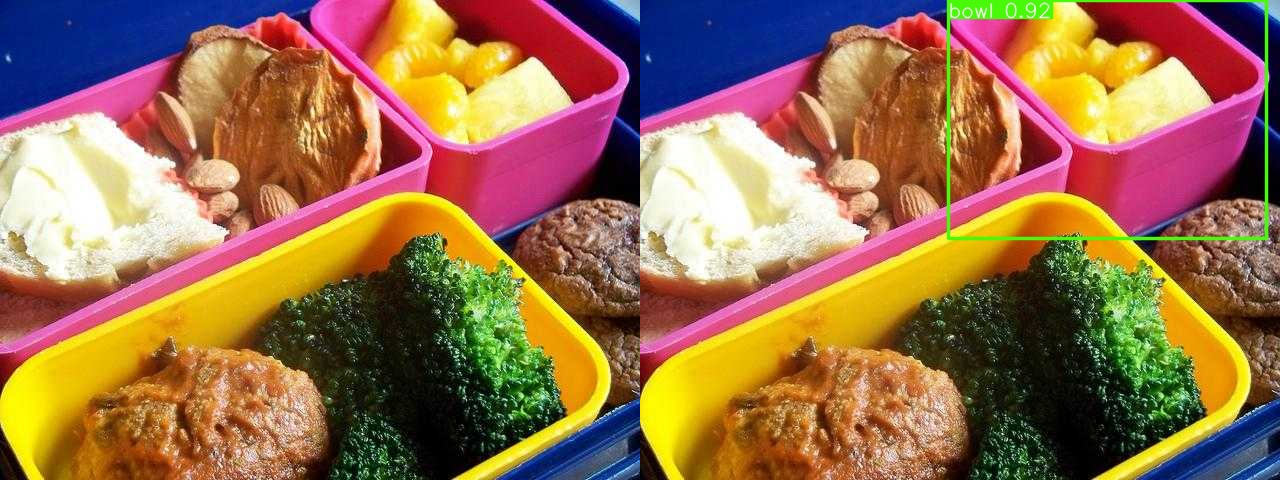

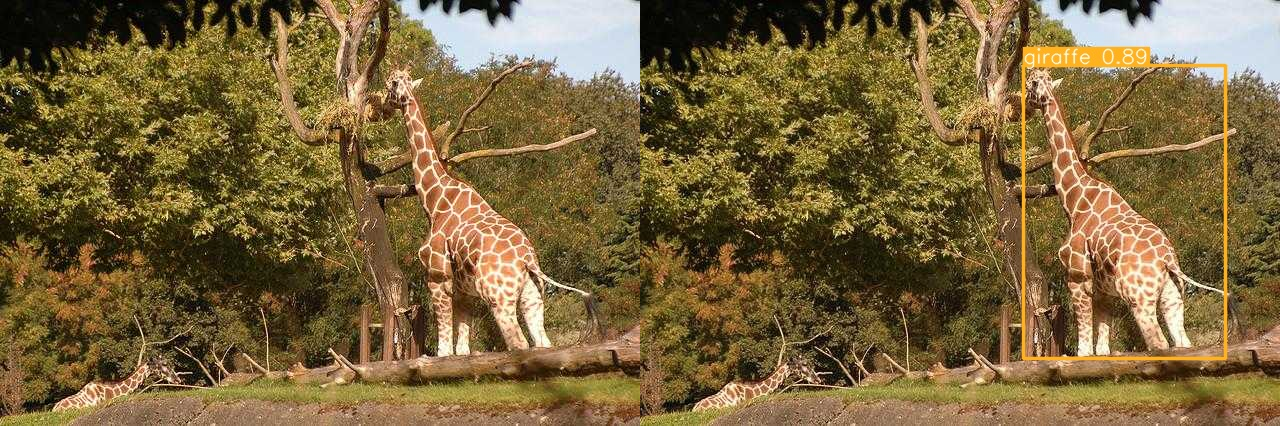

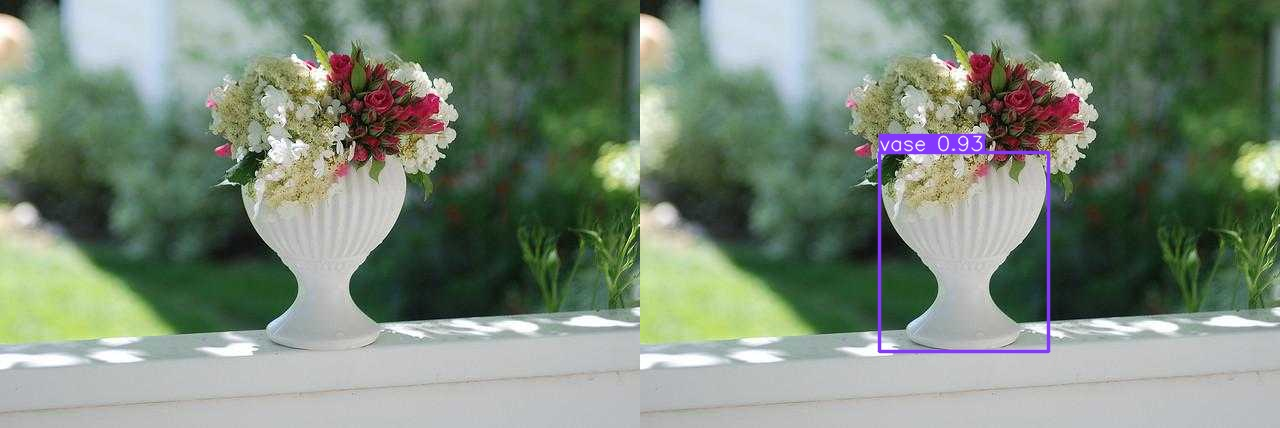

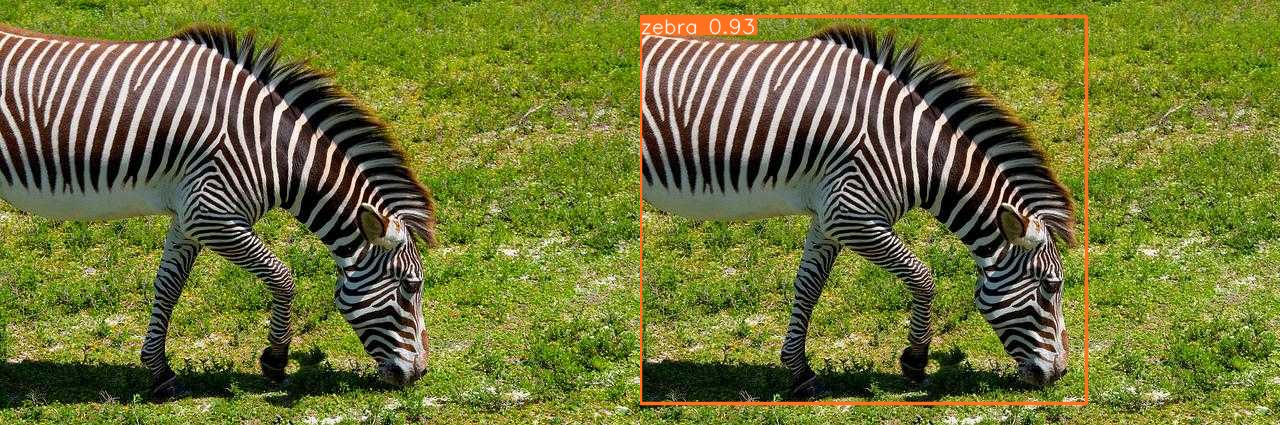

In [39]:
for input, output in zip(paths, saved_paths):
  image1 = cv2.imread(input)
  image2 = cv2.imread(output)
  display_side_by_side(image1, image2)


## Seeing speed
To judge how fast the model works, we should try to see how long it takes to preprocess, derive inference, and post process on the images. Ultralytics YOLO model gives us the speeds for the three phases
- Preprocess - probably done for some inner working to make any sort of image work with the ultralytics model
- Inference - Determine/Detect the conents in the image, the main part lies here
- Postprocess - probably reverting it back to what it was originally, could also include drawing bounding boxes and such.

Lets try tabulating these values

In [45]:
image_data = []

for result in image_results:
    speed = result.speed
    orig_shape = result.orig_shape
    image_data.append((orig_shape, speed['preprocess'], speed['inference'], speed['postprocess']))

print(tabulate(image_data, headers=[ "Original Shape","Preprocess", "Inference", "Postprocess",]))


Original Shape      Preprocess    Inference    Postprocess
----------------  ------------  -----------  -------------
(480, 640)            20.0369       745.459        5.43189
(426, 640)            14.1284       460.797        2.25592
(428, 640)             2.61521      288.958        1.76096
(425, 640)             2.14863      170.818        1.20807


## Results

Its apparent that the most time goes into drawing inferences, the image having highest resolution (480, 640) took 700ms (~7s) to get inferences from. This makes sense as inferences probably is the part where the model tries to `predict` anything as such.

## Future work
We could potentially go through the following

- Go through these datasets and see which datasets have most classes. If we find a dataset with a `face` label  (very unlikely) that would be jackpot.
- Test for performance against the different datasets

